In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("Customers.csv")

In [3]:
df2 = pd.read_csv("Transactions.csv")

In [4]:
df3 = pd.read_csv("Products.csv")

# Task 1: Exploratory Data Analysis (EDA) and Business Insights

# 1.1 EDA 

# EDA (Customers Dataset)

In [5]:
print("Total rows and columns(Customers):",df1.shape)
print("Total rows and columns(Transactions):",df2.shape)
print("Total rows and columns(Products):",df3.shape)

Total rows and columns(Customers): (200, 4)
Total rows and columns(Transactions): (1000, 7)
Total rows and columns(Products): (100, 4)


In [6]:
df1.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
df1.tail()

,CustomerID,CustomerName,Region,SignupDate
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03
199,C0200,Kelly Cross,Asia,2023-06-11


In [8]:
df1.isna().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [9]:
df1.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [11]:
df1['CustomerName'].nunique()

200

In [12]:
df1['Region'].nunique()

4

In [13]:
df1['Region'].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

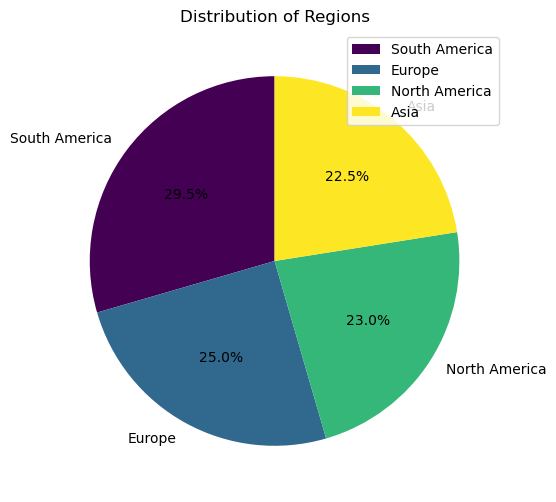

In [14]:
region_counts = df1['Region'].value_counts()

plt.figure(figsize=(6, 6))
region_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', legend=True)
plt.title('Distribution of Regions')
plt.ylabel('')
plt.show()


In [15]:

# Convert the 'SignupDate' column to datetime
df1['SignupDate'] = pd.to_datetime(df1['SignupDate'])

# Verify the change
print(df1['SignupDate'].head())

0   2022-07-10
1   2022-02-13
2   2024-03-07
3   2022-10-09
4   2022-08-15
Name: SignupDate, dtype: datetime64[ns]


In [16]:
# Extract year, month, and weekday
df1['Year'] = df1['SignupDate'].dt.year
df1['Month'] = df1['SignupDate'].dt.month
df1['Weekday'] = df1['SignupDate'].dt.day_name()

# View the updated DataFrame
print(df1.head())

  CustomerID        CustomerName         Region SignupDate  Year  Month  \
0      C0001    Lawrence Carroll  South America 2022-07-10  2022      7   
1      C0002      Elizabeth Lutz           Asia 2022-02-13  2022      2   
2      C0003      Michael Rivera  South America 2024-03-07  2024      3   
3      C0004  Kathleen Rodriguez  South America 2022-10-09  2022     10   
4      C0005         Laura Weber           Asia 2022-08-15  2022      8   

    Weekday  
0    Sunday  
1    Sunday  
2  Thursday  
3    Sunday  
4    Monday  


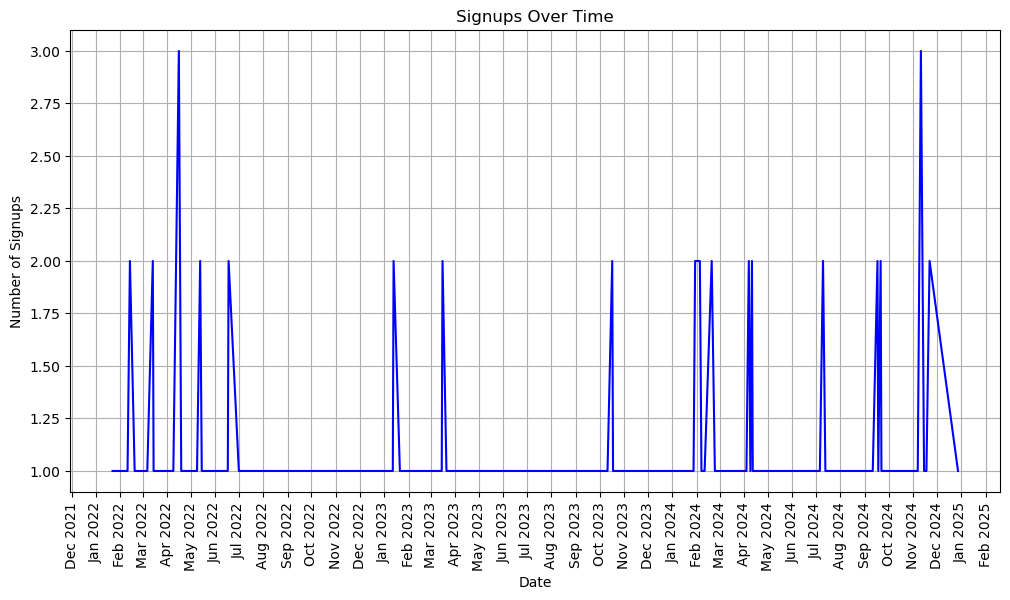

In [54]:

# Group data by date and count signups
signup_counts = df1['SignupDate'].value_counts().sort_index()

# Convert index to datetime for better formatting
signup_counts.index = pd.to_datetime(signup_counts.index)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(signup_counts.index, signup_counts.values, color='blue')
plt.title('Signups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Signups')
plt.grid(True)

# Format the x-axis to show months
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))  # Show every 3 months
plt.xticks(rotation=90)
plt.show()


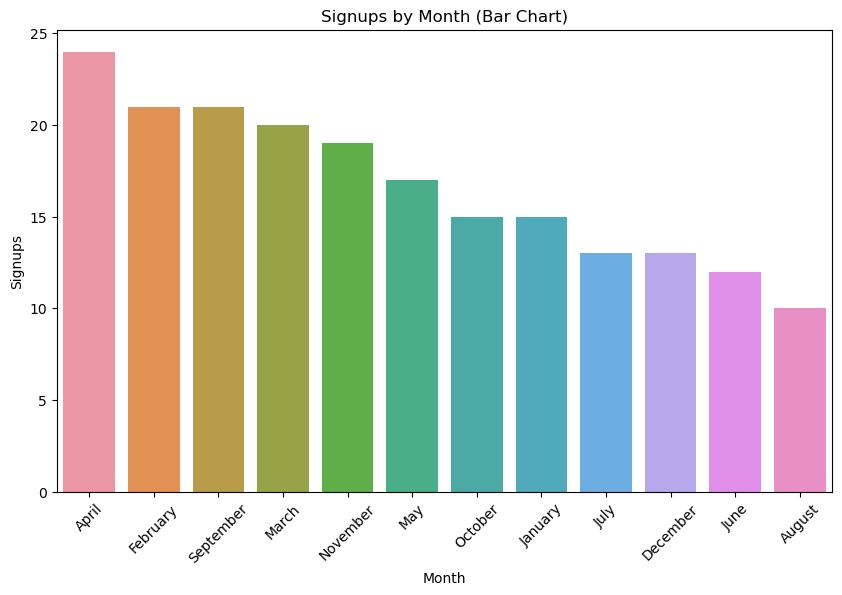

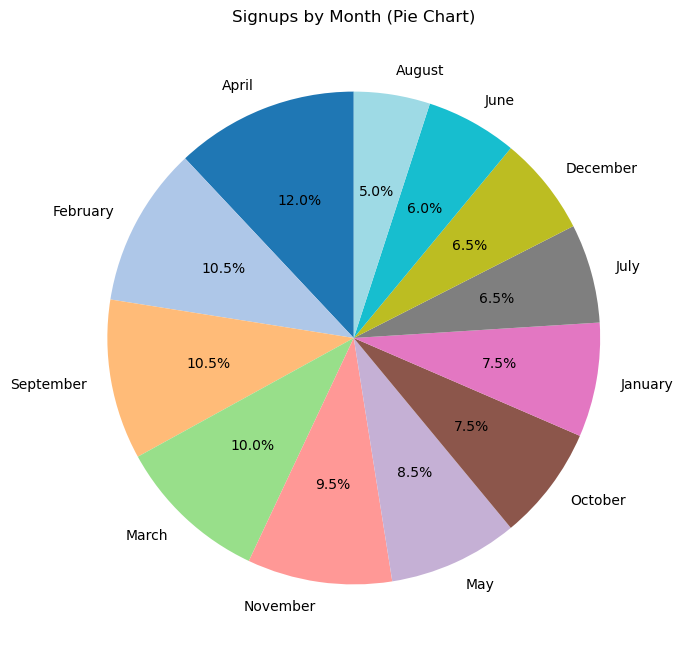

In [18]:

# Ensure 'SignupDate' is in datetime format
df1['SignupDate'] = pd.to_datetime(df1['SignupDate'])

# Extract month names
df1['MonthName'] = df1['SignupDate'].dt.month_name()

# Count signups by month
monthly_counts = df1['MonthName'].value_counts()

# Plot count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='MonthName', order=monthly_counts.index)
plt.title('Signups by Month (Bar Chart)')
plt.xlabel('Month')
plt.ylabel('Signups')
plt.xticks(rotation=45)
plt.show()

# Plot pie chart
plt.figure(figsize=(8, 8))
monthly_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', legend=False)
plt.title('Signups by Month (Pie Chart)')
plt.ylabel('')  # Hide y-axis label for aesthetics
plt.show()


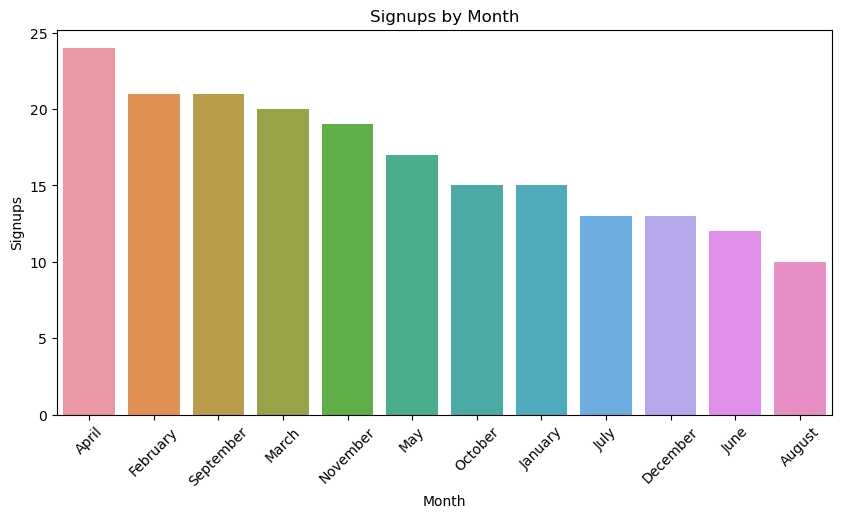

In [19]:

# Extract month names for plotting
df1['MonthName'] = df1['SignupDate'].dt.month_name()

plt.figure(figsize=(10,5))
sns.countplot(data=df1, x='MonthName', order=df1['MonthName'].value_counts().index)
plt.title('Signups by Month')
plt.xlabel('Month')
plt.ylabel('Signups')
plt.xticks(rotation=45)
plt.show()


C:\Users\diwak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


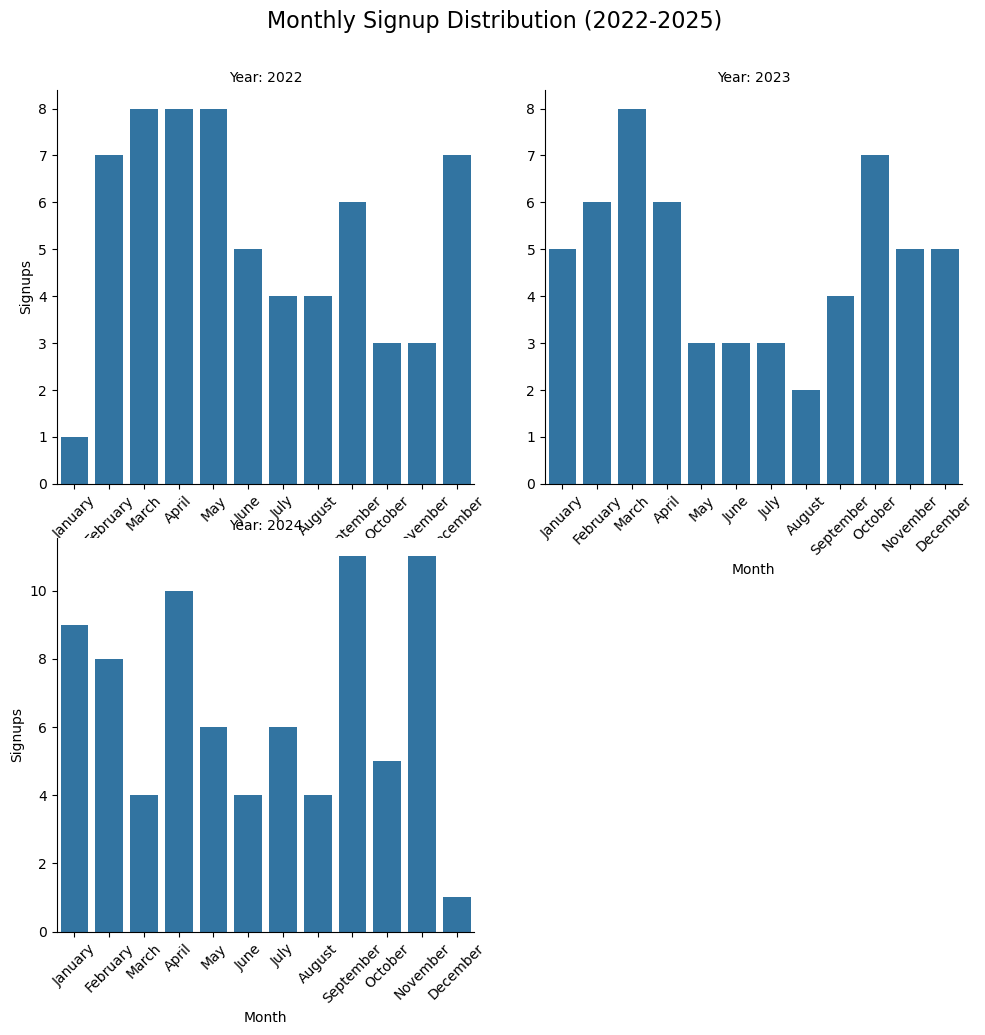

In [20]:


# Ensure 'SignupDate' is in datetime format
df1['SignupDate'] = pd.to_datetime(df1['SignupDate'])

# Extract year and month name
df1['Year'] = df1['SignupDate'].dt.year
df1['MonthName'] = df1['SignupDate'].dt.month_name()

# Filter data for years 2022 to 2025
filtered_df = df1[df1['Year'].between(2022, 2025)]

# Create a grid of subplots for each year
g = sns.FacetGrid(filtered_df, col='Year', col_wrap=2, height=5, sharex=False, sharey=False)
g.map(sns.countplot, 'MonthName', order=['January', 'February', 'March', 'April', 'May', 
                                         'June', 'July', 'August', 'September', 'October', 
                                         'November', 'December'])

# Add titles and adjust layout
g.set_titles("Year: {col_name}")
g.set_axis_labels("Month", "Signups")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Signup Distribution (2022-2025)', fontsize=16)
plt.show()


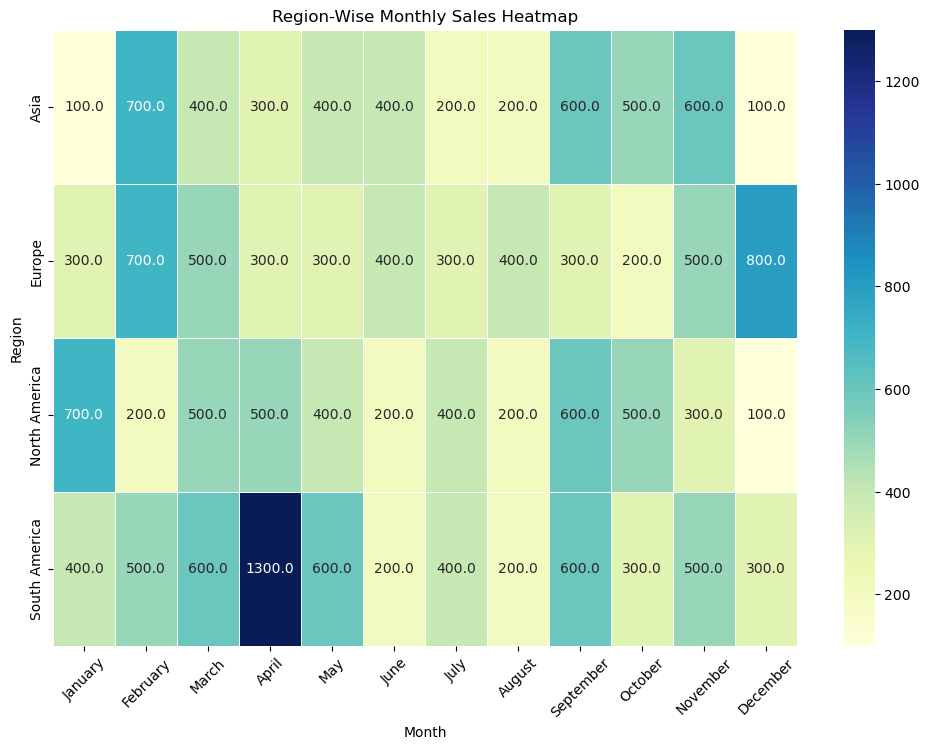

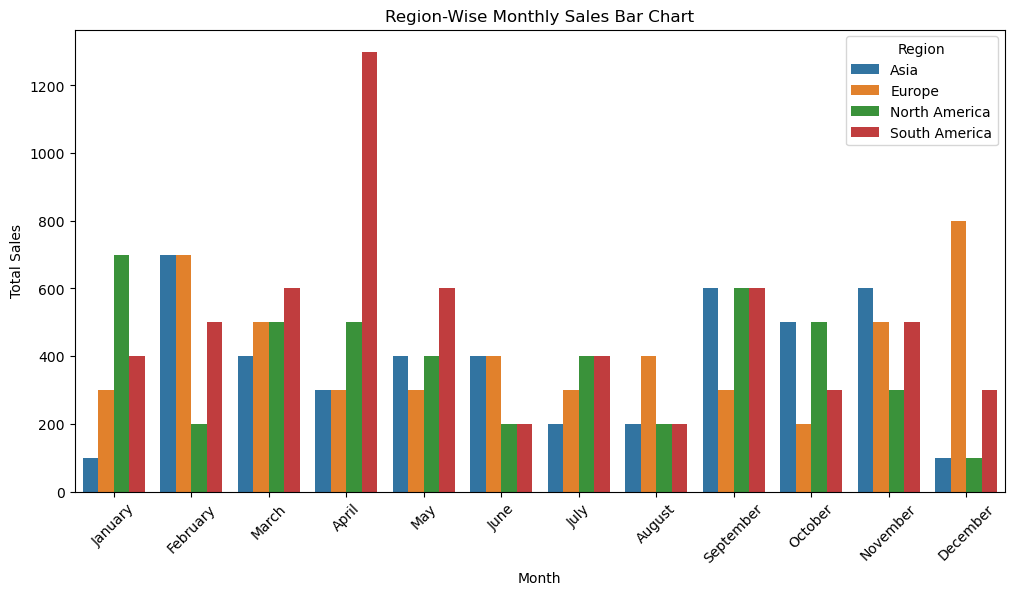

In [21]:


# Ensure 'SignupDate' is in datetime format
df1['SignupDate'] = pd.to_datetime(df1['SignupDate'])

# Extract MonthName if not already done
df1['MonthName'] = df1['SignupDate'].dt.month_name()

# Replace 'Sales' with your actual sales column
if 'Sales' not in df1.columns:
    df1['Sales'] = 100  # Example: Placeholder sales values for demonstration

# Group by Region and MonthName, and sum up Sales
region_monthly_sales = df1.groupby(['Region', 'MonthName'])['Sales'].sum().reset_index()

# Pivot data for better visualization (rows: Region, columns: MonthName)
pivot_data = region_monthly_sales.pivot(index='Region', columns='MonthName', values='Sales')

# Sort months in chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_data = pivot_data.reindex(columns=month_order)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Region-Wise Monthly Sales Heatmap")
plt.xlabel("Month")
plt.ylabel("Region")
plt.xticks(rotation=45)
plt.show()

# Alternatively: Bar plot for each region
plt.figure(figsize=(12, 6))
sns.barplot(data=region_monthly_sales, x='MonthName', y='Sales', hue='Region', order=month_order)
plt.title("Region-Wise Monthly Sales Bar Chart")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.show()


# EDA (Transactions Dataset)

In [22]:
df2.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [23]:
df2.isna().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [25]:
df2.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [26]:
df2['Quantity'].value_counts()

Quantity
4    261
3    254
2    246
1    239
Name: count, dtype: int64

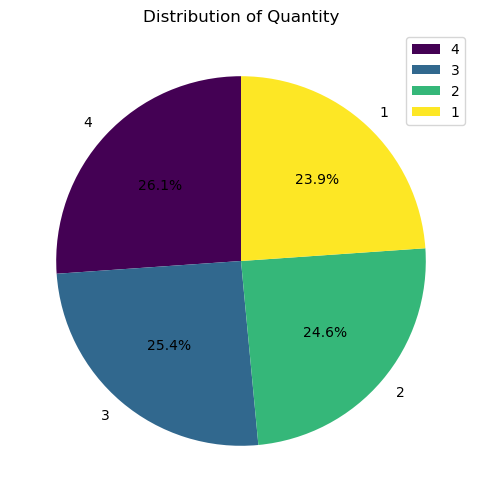

In [27]:
region_counts = df2['Quantity'].value_counts()

plt.figure(figsize=(6, 6))
region_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', legend=True)
plt.title('Distribution of Quantity')
plt.ylabel('')
plt.show()


In [28]:

# Ensure 'TransactionDate' is in datetime format
df2['TransactionDate'] = pd.to_datetime(df2['TransactionDate'])

# Extract Date Components
df2['Year'] = df2['TransactionDate'].dt.year
df2['Month'] = df2['TransactionDate'].dt.month
df2['Day'] = df2['TransactionDate'].dt.day
df2['Hour'] = df2['TransactionDate'].dt.hour
df2['Weekday'] = df2['TransactionDate'].dt.day_name()




In [30]:
df2['Year'].value_counts()

Year
2024    996
2023      4
Name: count, dtype: int64

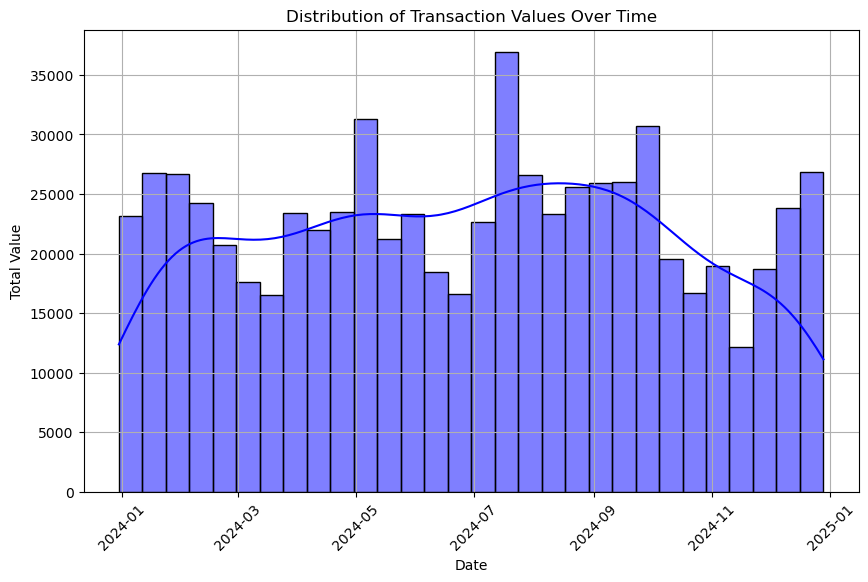

In [33]:

# Distribution plot of TotalValue over time (by TransactionDate)
plt.figure(figsize=(10, 6))
sns.histplot(df2, x='TransactionDate', weights='TotalValue', kde=True, color='blue', bins=30)
plt.title("Distribution of Transaction Values Over Time")
plt.xlabel("Date")
plt.ylabel("Total Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


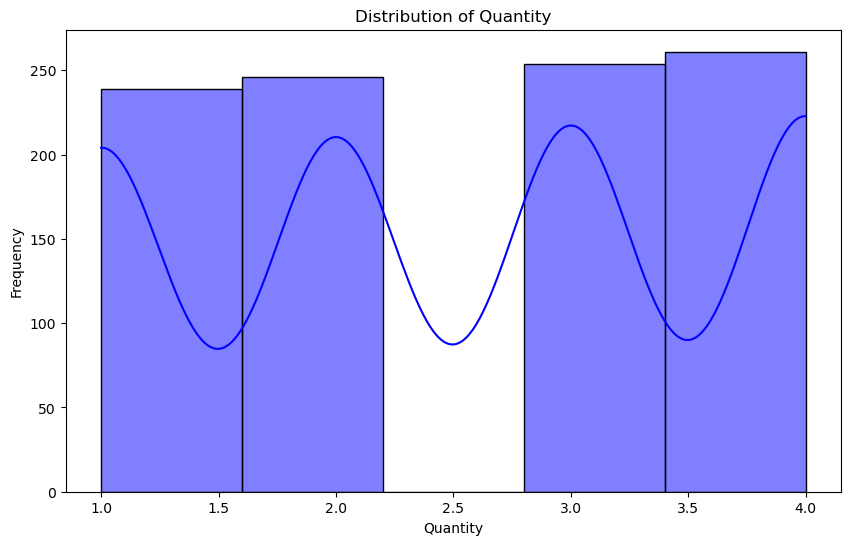

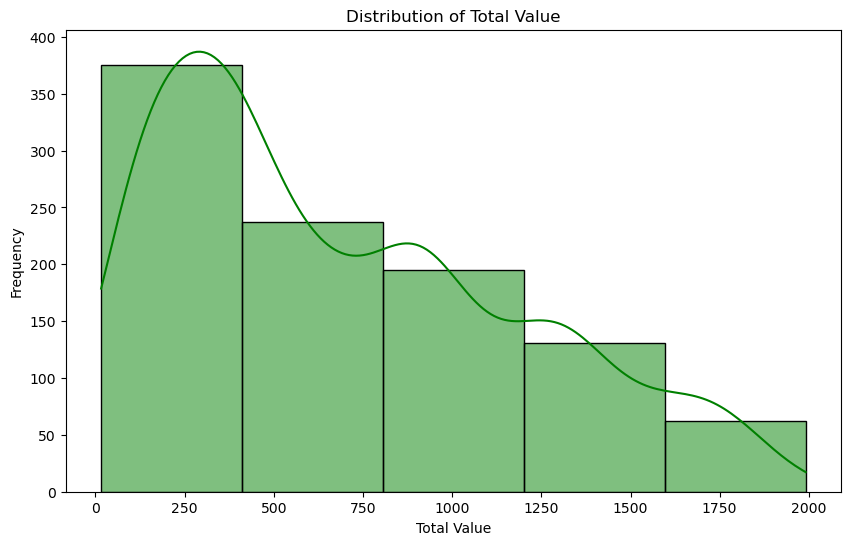

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Quantity'], kde=True, bins=5, color='blue')
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df2['TotalValue'], kde=True, bins=5, color='green')
plt.title("Distribution of Total Value")
plt.xlabel("Total Value")
plt.ylabel("Frequency")
plt.show()

C:\Users\diwak\AppData\Local\Temp\ipykernel_18584\1999327058.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df2, x='Weekday', y='TotalValue', ci=None, palette='viridis', order=[


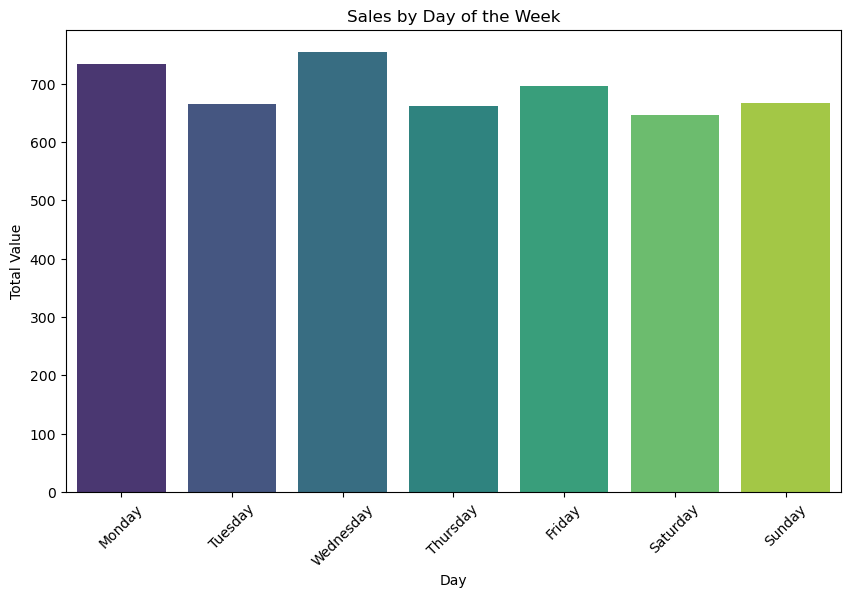

In [36]:
# Sales by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(data=df2, x='Weekday', y='TotalValue', ci=None, palette='viridis', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Sales by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Value")
plt.xticks(rotation=45)
plt.show()

In [37]:
df2['CustomerID'].value_counts()

CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
         ..
C0058     1
C0014     1
C0151     1
C0078     1
C0110     1
Name: count, Length: 199, dtype: int64

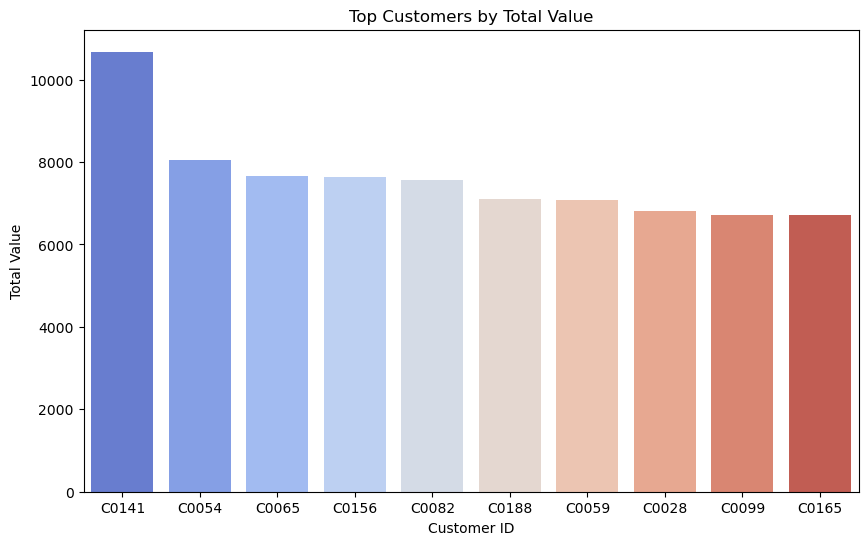

In [39]:

# Top Customers by Total Value
top_customers = df2.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='coolwarm')
plt.title("Top Customers by Total Value")
plt.xlabel("Customer ID")
plt.ylabel("Total Value")
plt.show()

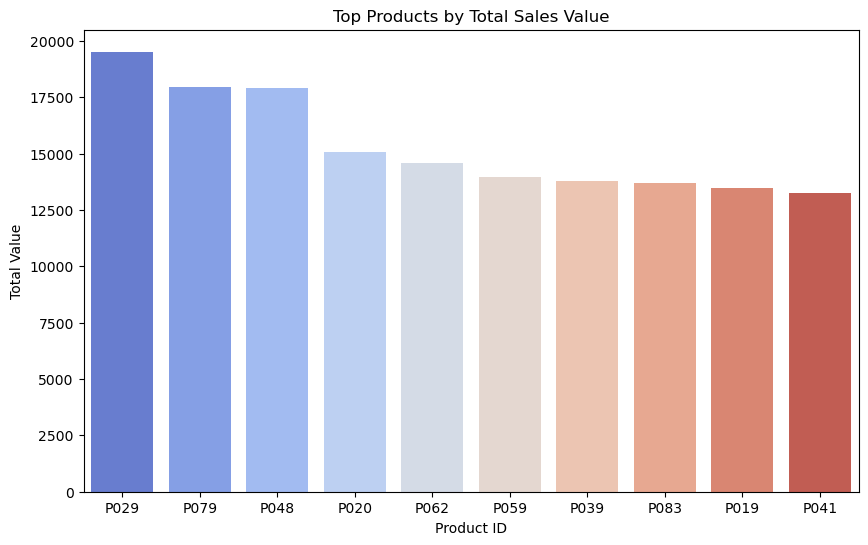

In [40]:
#  Top Products by Total Sales Value
top_products = df2.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')
plt.title("Top Products by Total Sales Value")
plt.xlabel("Product ID")
plt.ylabel("Total Value")
plt.show()

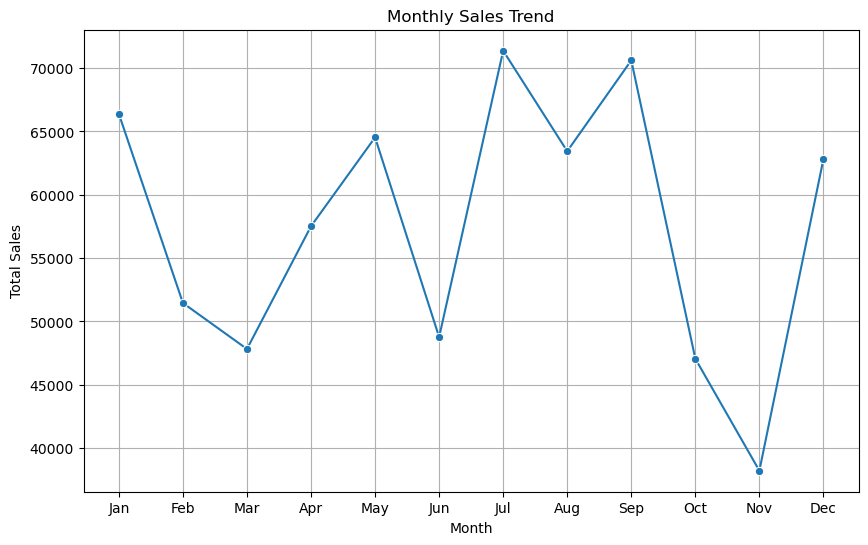

In [42]:

#  Monthly Sales Trend

monthly_sales = df2.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13), [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

# EDA (Products Datasets)

In [43]:
df3.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [44]:


# Ensure 'Price' is in numerical format (if not already)
df3['Price'] = pd.to_numeric(df3['Price'], errors='coerce')

# --------------------------------------------
# 1. Dataset Overview
# --------------------------------------------
print("Dataset Info:")
print(df3.info())

# Check for missing values
print("\nMissing Values:")
print(df3.isnull().sum())

# Basic summary statistics
print("\nSummary Statistics for Price:")
print(df3['Price'].describe())

# Count unique products and categories
print("\nUnique Products and Categories:")
print(f"Number of unique products: {df3['ProductID'].nunique()}")
print(f"Number of unique categories: {df3['Category'].nunique()}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Missing Values:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Summary Statistics for Price:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64

Unique Products and Categories:
Number of unique products: 100
Number of unique categories: 4


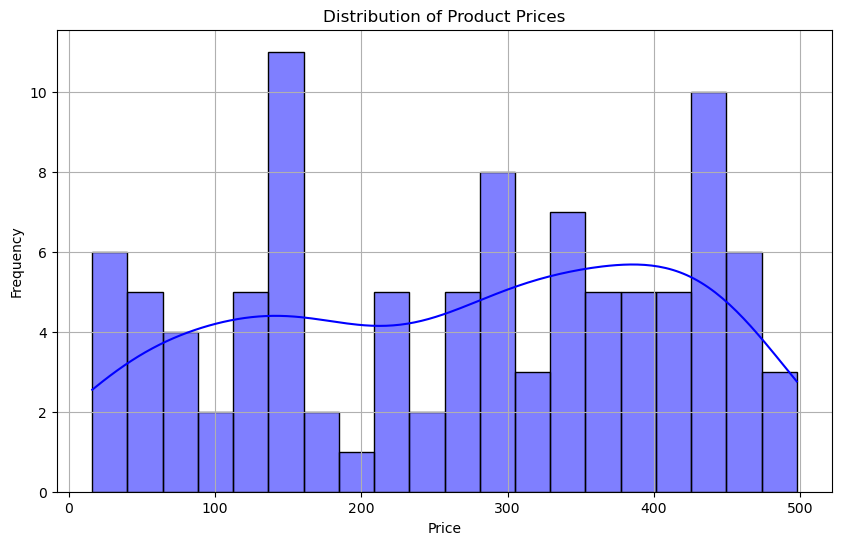

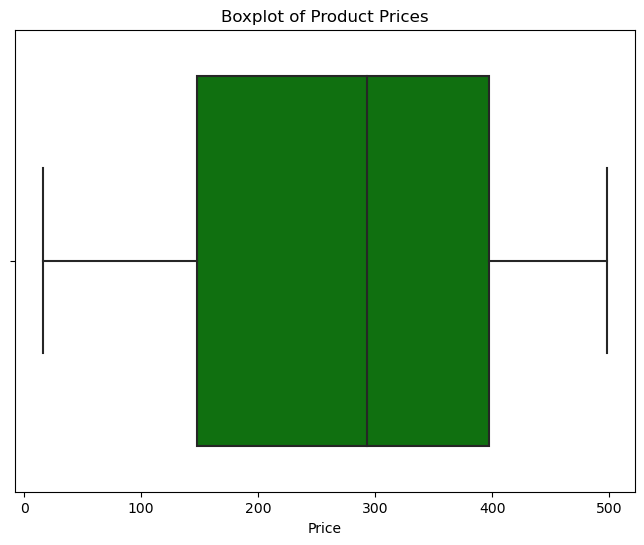

In [45]:

#  Price Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df3['Price'], kde=True, bins=20, color='blue')
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Boxplot to check for outliers in price
plt.figure(figsize=(8, 6))
sns.boxplot(data=df3, x='Price', color='green')
plt.title("Boxplot of Product Prices")
plt.xlabel("Price")
plt.show()


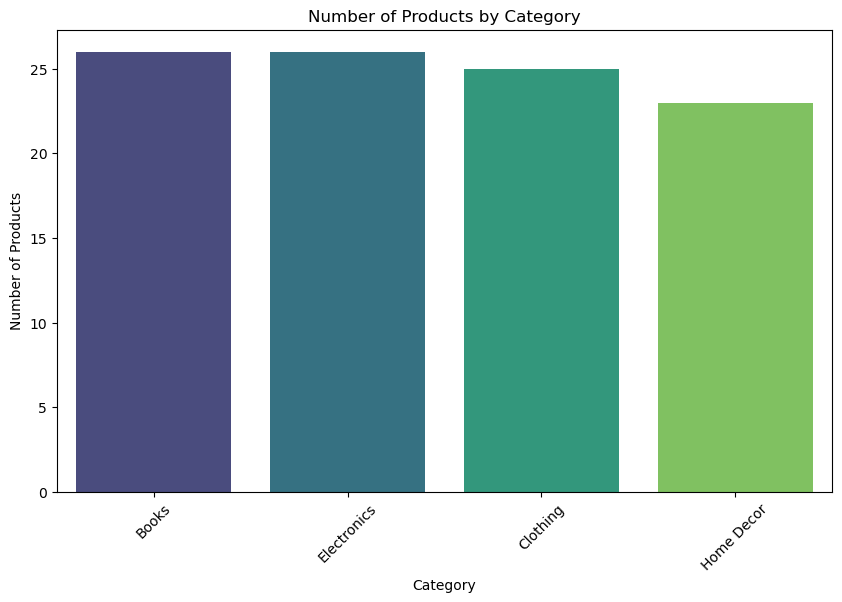

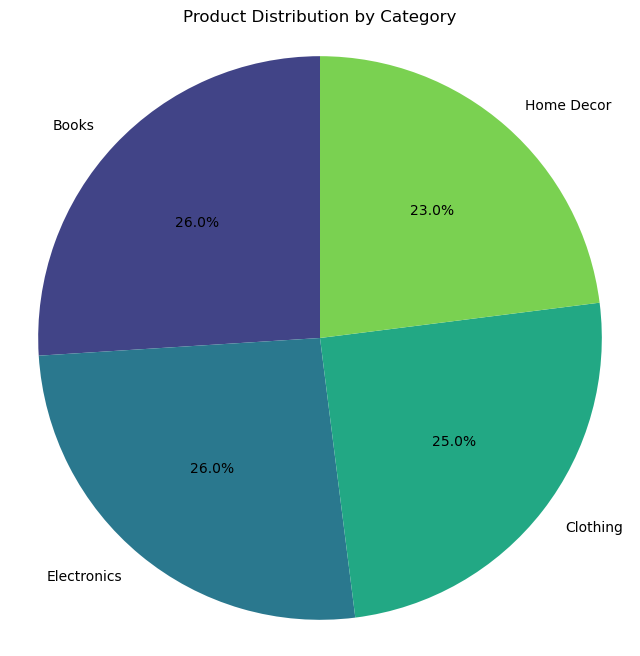

In [46]:
# Product Category Analysis

# Count the number of products in each category
category_counts = df3['Category'].value_counts()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title("Number of Products by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(category_counts)))
plt.title("Product Distribution by Category")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


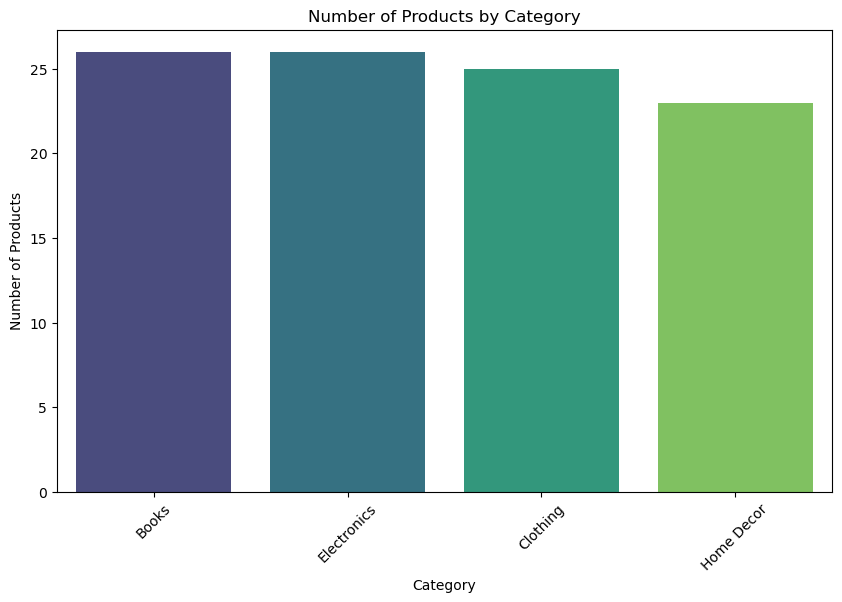

In [47]:
# Product Category Analysis
# Count the number of products in each category
category_counts = df3['Category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title("Number of Products by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

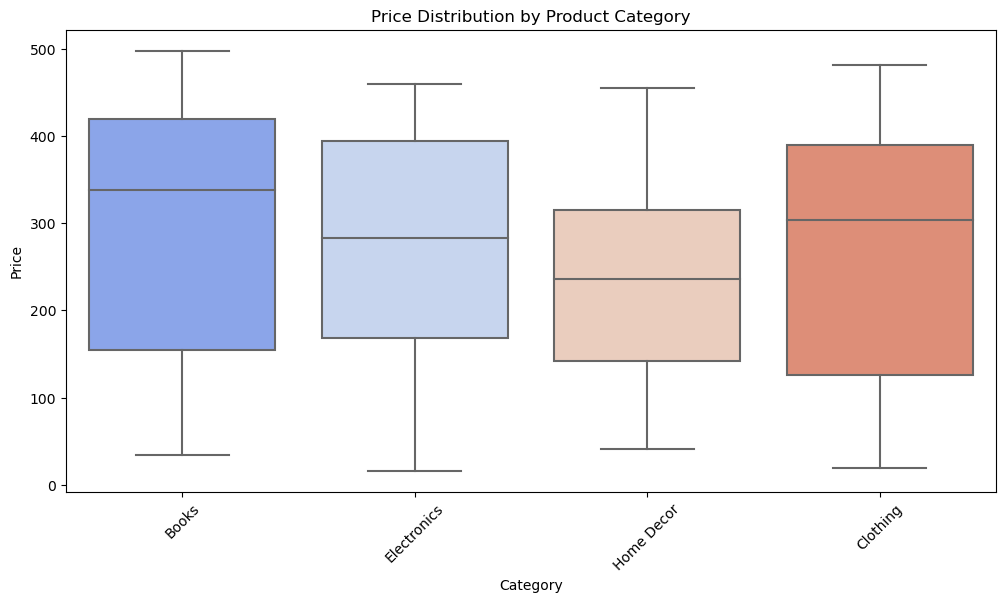

In [48]:
# Boxplot of prices by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3, x='Category', y='Price', palette='coolwarm')
plt.title("Price Distribution by Product Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

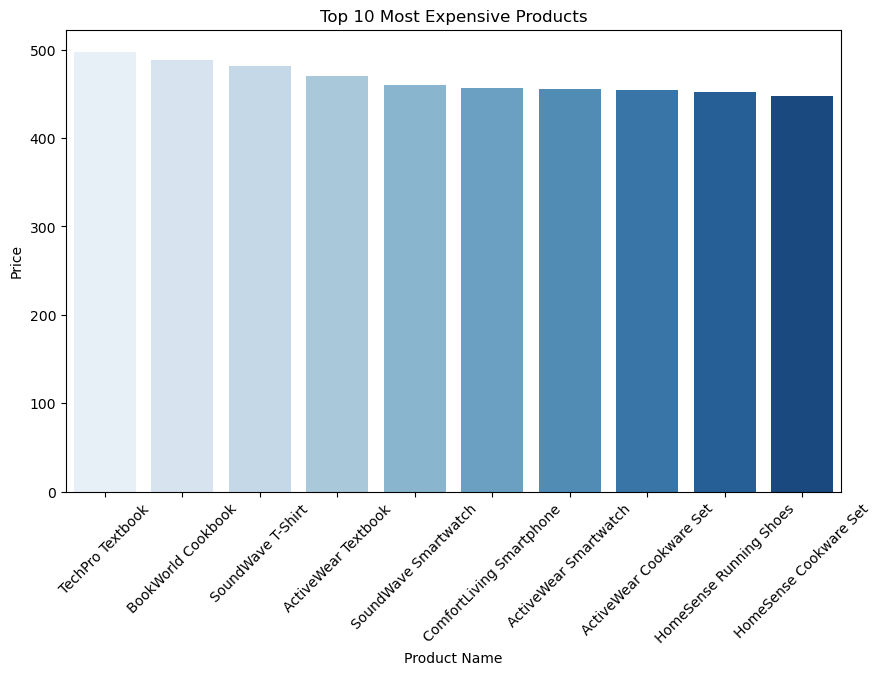

In [49]:
# Top Expensive Products
top_expensive_products = df3.sort_values(by='Price', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_expensive_products['ProductName'], y=top_expensive_products['Price'], palette='Blues')
plt.title("Top 10 Most Expensive Products")
plt.xlabel("Product Name")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [55]:
df3.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [56]:
df1.head()

,CustomerID,CustomerName,Region,SignupDate,Year,Month,Weekday,MonthName,Sales
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,Sunday,July,100
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022,2,Sunday,February,100
2,C0003,Michael Rivera,South America,2024-03-07,2024,3,Thursday,March,100
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022,10,Sunday,October,100
4,C0005,Laura Weber,Asia,2022-08-15,2022,8,Monday,August,100


In [57]:
df2.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Year,Month,Day,Hour,Weekday
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024,8,25,12,Sunday
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024,5,27,22,Monday
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024,4,25,7,Thursday
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024,3,26,22,Tuesday
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024,3,21,15,Thursday
